# Module 4 : Performance measurements of Random Forest Algorithm

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
#Load given dataset
data = p.read_csv("rain.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142183,2017-06-15,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,S,...,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No,0.0,No
142184,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,0.0,No
142185,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,0.0,No
142186,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0.0,No
142187,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,0.0,No
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [5]:
df=data.dropna()

In [6]:
del df['Date']

In [7]:
df.Location.unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [8]:
df.WindGustDir.unique()

array(['SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW'], dtype=object)

In [9]:
df.WindDir9am.unique()

array(['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW',
       'E', 'NNW', 'ESE', 'WSW', 'SW'], dtype=object)

In [10]:
df.WindDir3pm.unique()

array(['SW', 'SSE', 'NNW', 'WSW', 'WNW', 'S', 'ENE', 'N', 'SE', 'NNE',
       'NW', 'E', 'ESE', 'NE', 'SSW', 'W'], dtype=object)

In [11]:
df.RainToday.unique()

array(['No', 'Yes'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [13]:
df.Location.unique()

array([ 4,  5, 11, 13, 19, 20, 22, 24,  3, 18,  9,  8, 10, 17, 23,  1,  2,
       21, 12, 14, 25, 16, 15,  7,  0,  6])

In [14]:
df.WindGustDir.unique()

array([11,  8,  5, 14,  3,  9,  1,  4,  0, 12, 13, 15,  6,  2, 10,  7])

In [15]:
df.WindDir9am.unique()

array([ 1, 10,  5, 14,  7,  3,  8,  9,  4, 13, 11,  0,  6,  2, 15, 12])

In [16]:
df.WindDir3pm.unique()

array([12, 10,  6, 15, 14,  8,  1,  3,  9,  5,  7,  0,  2,  4, 11, 13])

In [17]:
df.RainToday.unique()

array([0, 1])

In [18]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='RainTomorrow', axis=1)
#Response variable
y = df.loc[:,'RainTomorrow']    

In [19]:
'''We'll use a test size of 30%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  39494
Number of test dataset:  16926
Total number of dataset:  56420


In [20]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc= RandomForestClassifier()

rfc.fit(X_train,y_train)

predictRF = rfc.predict(X_test)

print("")
print('Classification report of Random Forest Results:')
print("")
print(classification_report(y_test,predictRF))

print("")
cm1=confusion_matrix(y_test,predictRF)
print('Confusion Matrix result of Random Forest Classifier is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(rfc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Random Forest Classifier is:",accuracy.mean() * 100)
RF=accuracy.mean() * 100


Classification report of Random Forest Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13198
           1       1.00      1.00      1.00      3728

    accuracy                           1.00     16926
   macro avg       1.00      1.00      1.00     16926
weighted avg       1.00      1.00      1.00     16926


Confusion Matrix result of Random Forest Classifier is:
 [[13198     0]
 [    0  3728]]

Sensitivity :  1.0

Specificity :  1.0

Cross validation test results of accuracy:
[1. 1. 1. 1. 1.]

Accuracy result of Random Forest Classifier is: 100.0


In [22]:
def graph():
    import matplotlib.pyplot as plt
    data=[RF]
    alg="Random Forest Classifier"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("m"))
    plt.title("Accuracy comparison of Rain Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)

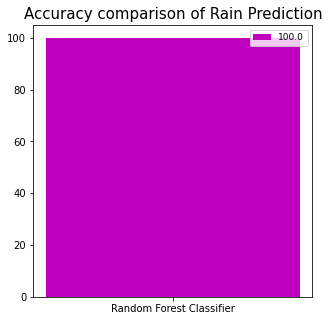

In [23]:
graph()

In [24]:
TP = cm1[0][0]
FP = cm1[1][0]
FN = cm1[1][1]
TN = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 13198
True Negative : 0
False Positive : 0
False Negative : 3728

True Positive Rate : 0.7797471345858442
True Negative Rate : nan
False Positive Rate : nan
False Negative Rate : 0.22025286541415573

Positive Predictive Value : 1.0
Negative predictive value : 0.0


Confusion matrix-RandomForestClassifier:
[[13198     0]
 [    0  3728]]


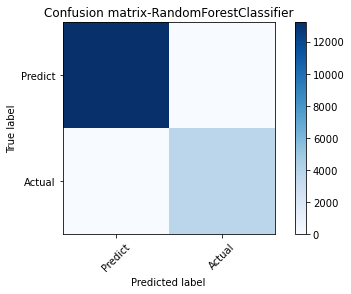

In [25]:
def plot_confusion_matrix(cm1, title='Confusion matrix-RandomForestClassifier', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm1=confusion_matrix(y_test, predictRF)
print('Confusion matrix-RandomForestClassifier:')
print(cm1)
plot_confusion_matrix(cm1)

# Creating pkl File

In [16]:
import joblib
joblib.dump(rfc,'rf.pkl')

['rf.pkl']